# disneyland sentiment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
disney = pd.read_csv("/content/drive/MyDrive/NLP Disneyland Project/DisneylandReviews.csv", encoding="latin-1")
df = disney.copy()

In [4]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [6]:
df.shape

(42656, 6)

In [7]:
df.drop("Review_ID", axis=1, inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,42656.0,4.217695,1.063371,1.0,4.0,5.0,5.0,5.0


In [9]:
df.Year_Month=df.Year_Month.apply(pd.to_datetime, errors ='coerce')

df["month"]=df.Year_Month.dt.month
df["year"]=df.Year_Month.dt.year

df.drop("Year_Month", axis=1, inplace=True)

In [10]:
df.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,4.0,2019.0
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,5.0,2019.0
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,4.0,2019.0
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,4.0,2019.0
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,4.0,2019.0


# text preprocessing

In [11]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [12]:
#lowercase
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
#numerical values
df["Review_Text"] = df["Review_Text"].str.replace("\d","")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-601326991.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["Review_Text"] = df["Review_Text"].str.replace("\d","")


In [14]:
#punctation
df["Review_Text"] = df["Review_Text"].str.replace("[^\w\s]","")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-51988692.py:2: SyntaxWarning: invalid escape sequence '\w'
  df["Review_Text"] = df["Review_Text"].str.replace("[^\w\s]","")


In [15]:
#stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#lemmatization
from textblob import Word
nltk.download("wordnet")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
#word tokenization
from nltk.tokenize import word_tokenize
df["tokens"] = df["Review_Text"].apply(lambda x: TextBlob(x).words)

In [19]:
df["frequency"] = df["Review_Text"].apply(lambda x: len(str(x).split(" ")))

In [20]:
df.groupby("frequency").max()
df[df["Review_Text"].str.contains("visited disneyland paris least")]
longest_comment=df.iloc[42023,2]

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [22]:
longest_comment_tags=TextBlob(longest_comment).tags

In [23]:
df.tokens[4]

WordList(['location', 'city', 'took', 'around', '1', 'hour', 'kowlon', 'kids', 'like', 'disneyland', 'much', 'everything', 'fine', 'really', 'crowded', 'hot', 'hong', 'kong'])

In [24]:
df.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4.0,2019.0,"[ever, disneyland, anywhere, find, disneyland,...",32
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",115
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",86
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",49
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, 1, hour, kowlon...",18


# data visualization

In [25]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [26]:
# we need convert all reviews to single text

text = " ".join(i for i in df.Review_Text)

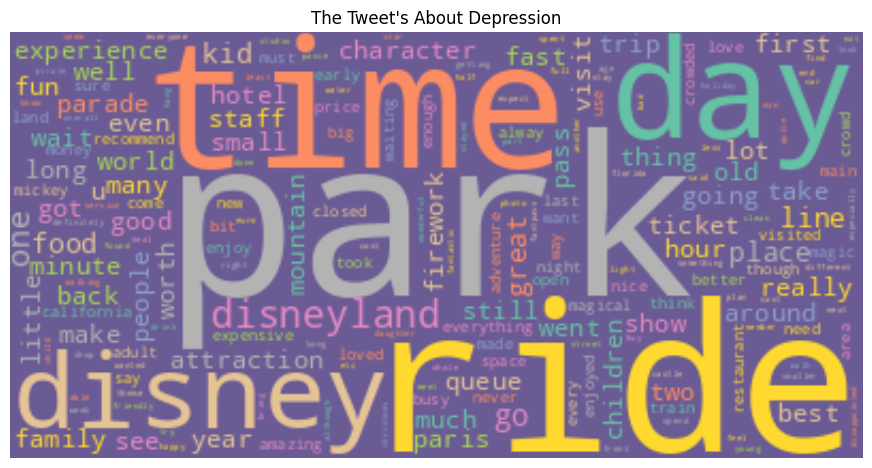

In [27]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [28]:
print("\n",
      "\n",text.count("disney"),
      "\n",text.count("park"),
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("time"),
      "\n",text.count("disneyland"),
      "\n",text.count("great"),
      "\n",text.count("really"),
      "\n",text.count("children"),
      "\n",text.count("minute"),
     )


 
 73168 
 57501 
 54146 
 48961 
 41484 
 33951 
 16969 
 12447 
 8613 
 8461


In [29]:
data = {
    "title": ["disney", "park" ,"ride", "day", "time", "disneyland",
              "great","really","children", "minute"],
    "count": [73168, 57501, 54146, 48963, 41484, 33951, 16969, 12447, 8619, 8461],
}

In [30]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,disney,73168
1,park,57501
2,ride,54146
3,day,48963
4,time,41484
5,disneyland,33951
6,great,16969
7,really,12447
8,children,8619
9,minute,8461


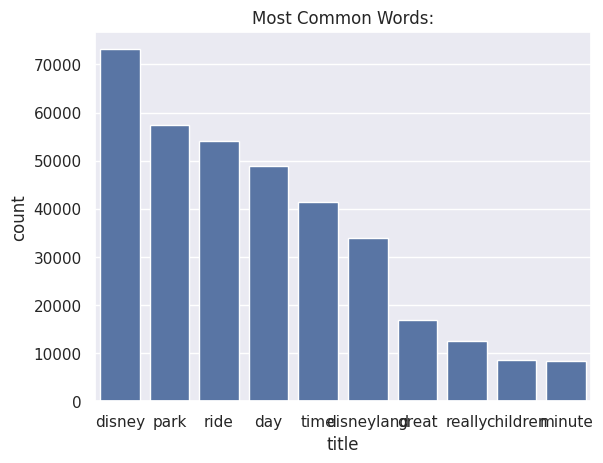

In [31]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

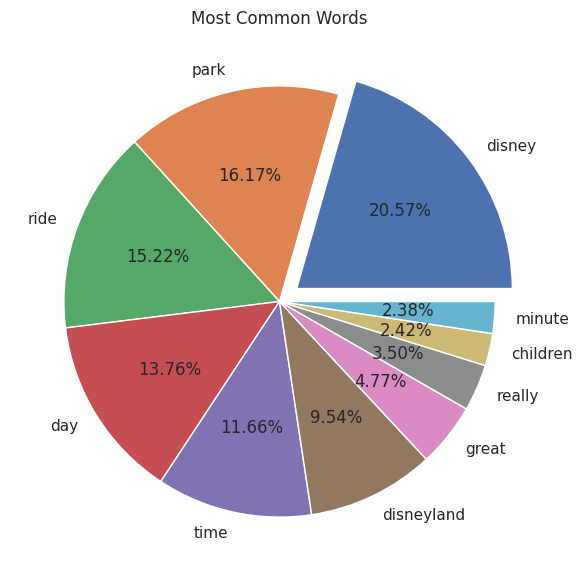

In [32]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0]
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

In [33]:
#rating
#reviewer_location
#branch
#month
#year

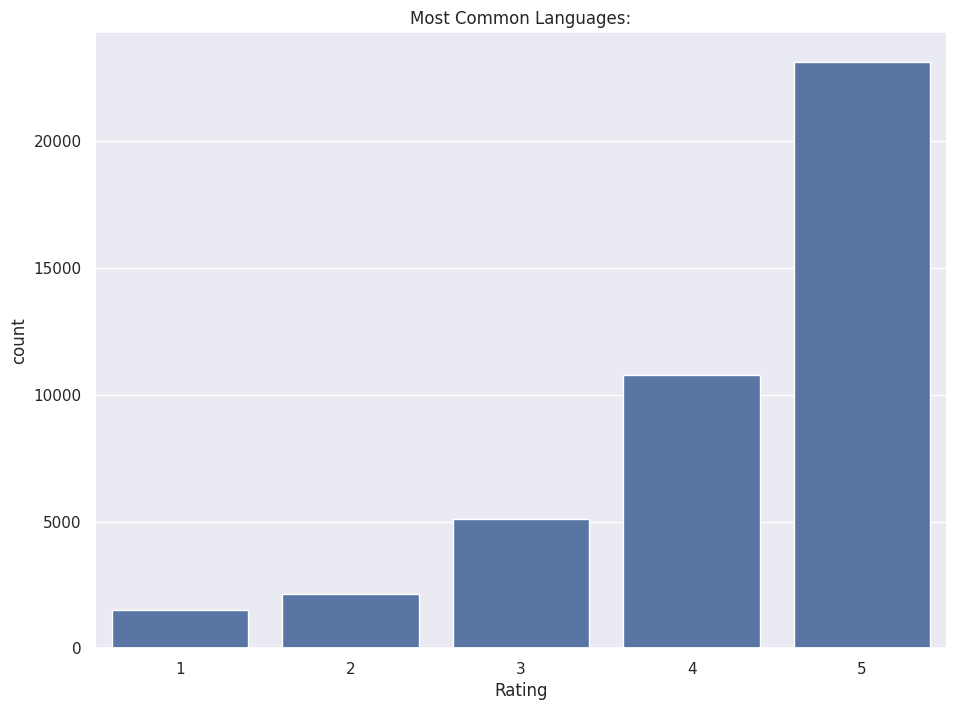

In [34]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Rating").set(title="Most Common Languages:");

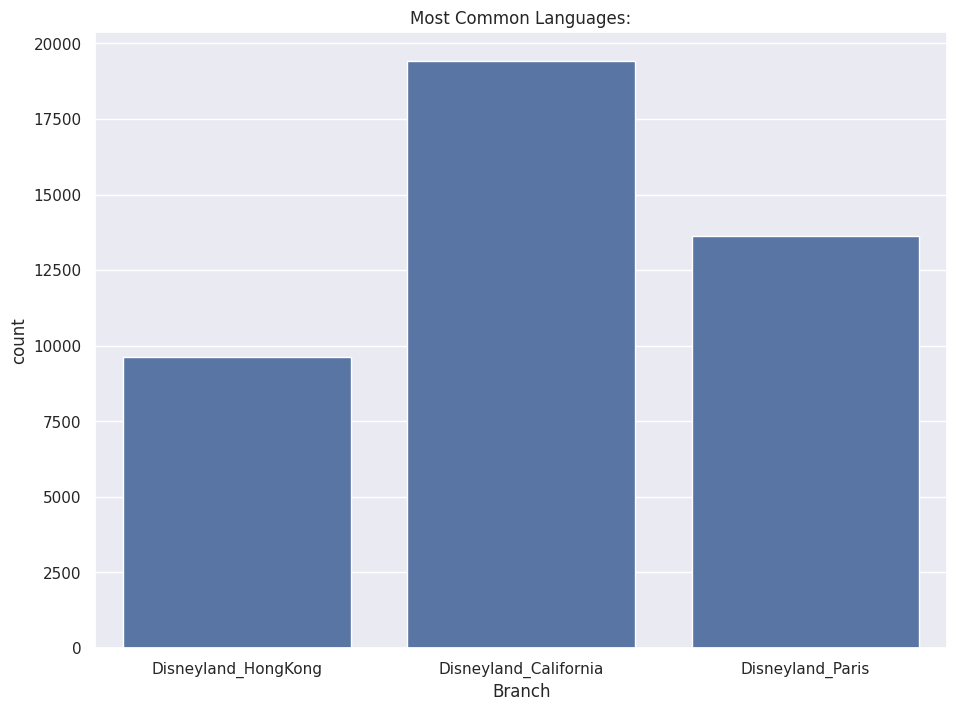

In [35]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Branch").set(title="Most Common Languages:");

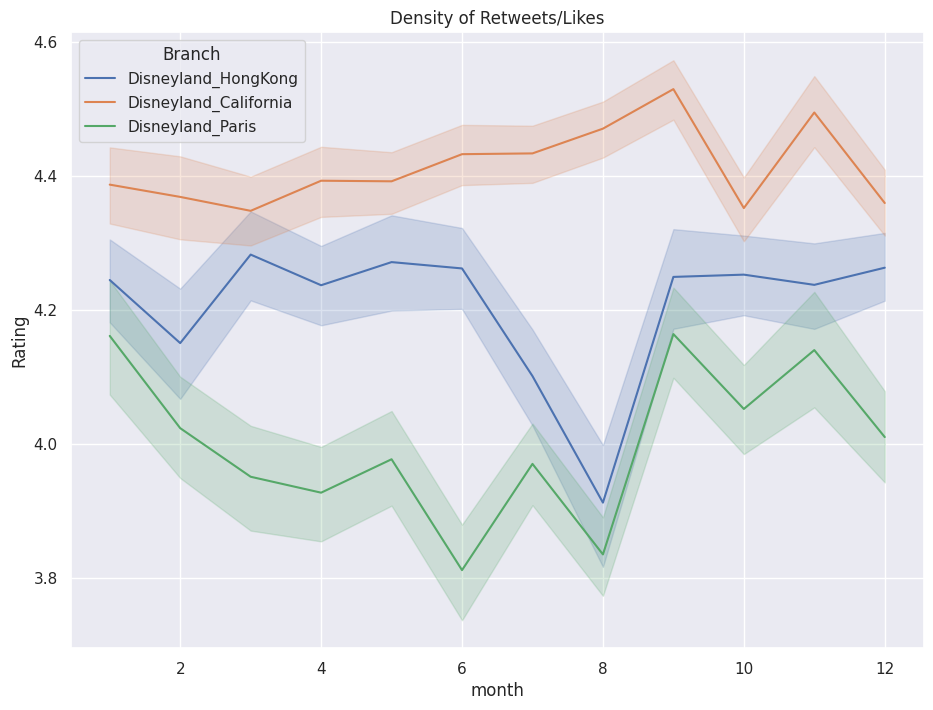

In [40]:
sns.lineplot(data=df, x="month", y="Rating", hue="Branch").set(title="Density of Retweets/Likes");

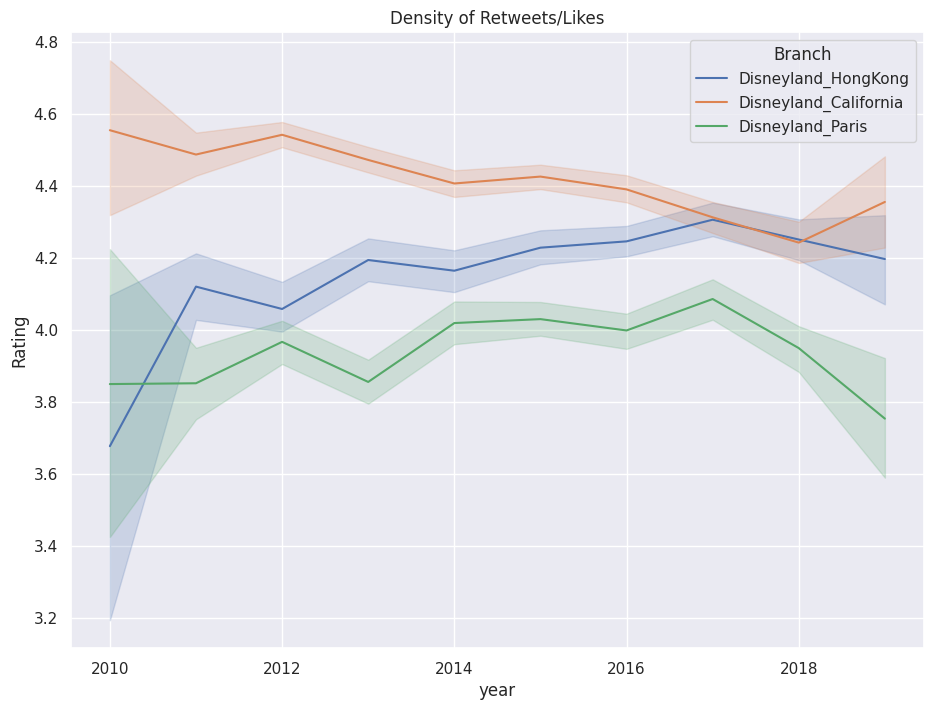

In [41]:
sns.lineplot(data=df, x="year", y="Rating", hue="Branch").set(title="Density of Retweets/Likes");

# sentiment

In [42]:
df.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4.0,2019.0,"[ever, disneyland, anywhere, find, disneyland,...",32
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",115
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",86
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",49
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, 1, hour, kowlon...",18


In [43]:
!pip install textblob

from textblob import TextBlob

In [44]:
blob_emptyline2 = []

for i in df["Review_Text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [45]:
df_blob2 = pd.DataFrame(blob_emptyline2)
df_blob2.head()

,polarity,subjectivity
0,0.231481,0.531481
1,0.199099,0.383889
2,0.226548,0.410238
3,0.222222,0.505556
4,0.266667,0.437500


In [46]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4.0,2019.0,"[ever, disneyland, anywhere, find, disneyland,...",32,0.231481,0.531481
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",115,0.199099,0.383889
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",86,0.226548,0.410238
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",49,0.222222,0.505556
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, 1, hour, kowlon...",18,0.266667,0.437500


In [47]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

In [48]:
df_blob3.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,4.0,2019.0,"[ever, disneyland, anywhere, find, disneyland,...",32,0.231481,0.531481,Positive
1,4,Philippines,"since last time visit hk disneyland .. yet, ti...",Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",115,0.199099,0.383889,Positive
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",86,0.226548,0.410238,Positive
3,4,Australia,hk disneyland great compact park. unfortunatel...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",49,0.222222,0.505556,Positive
4,4,United Kingdom,"location city, took around 1 hour kowlon, kids...",Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, 1, hour, kowlon...",18,0.266667,0.437500,Positive


# result

In [49]:
result = df_blob3["Sentiment"].value_counts()

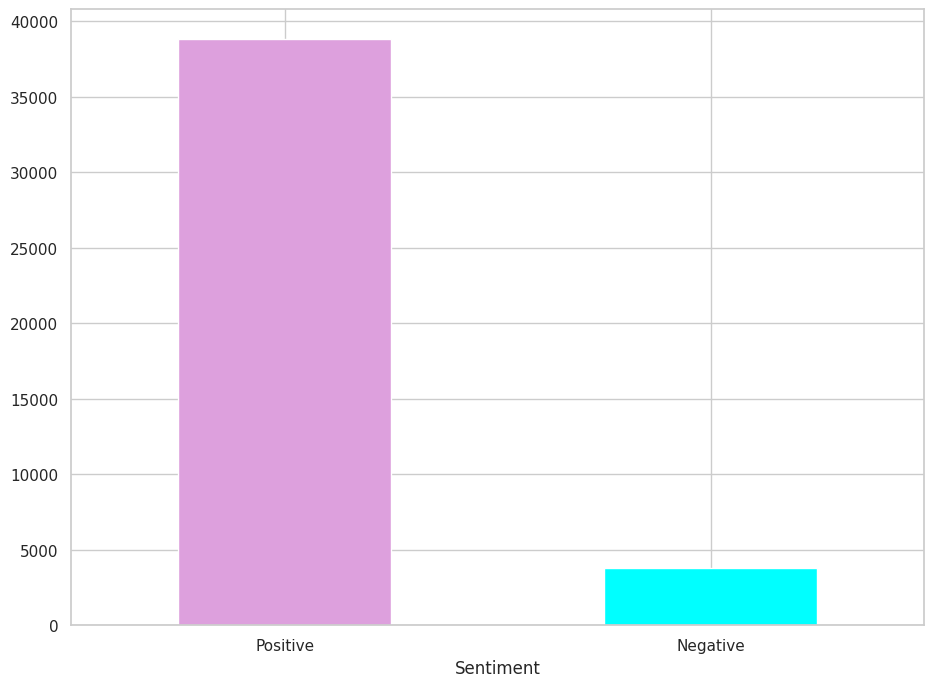

In [50]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [51]:
df_blob3.groupby("Sentiment").count()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,
Negative,3794,3794,3794,3794,3563,3563,3794,3794,3794,3794
Positive,38862,38862,38862,38862,36480,36480,38862,38862,38862,38862


In [52]:
df_blob3.groupby("polarity").max()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,
-1.000000,5,United States,visited rainy satarday hope lines would shorte...,Disneyland_Paris,7.0,2018.0,"[visited, rainy, satarday, hope, lines, would,...",20,1.000000,Negative
-0.976562,2,Belgium,use go every year disneyland paris. quality se...,Disneyland_Paris,5.0,2016.0,"[use, go, every, year, disneyland, paris, qual...",11,0.700000,Negative
-0.875000,5,Canada,"honestly, bad thing say park? set bar places t...",Disneyland_California,12.0,2012.0,"[honestly, bad, thing, say, park, set, bar, pl...",12,0.666667,Negative
-0.800000,5,Canada,food boring dine go place serves soup sandwhic...,Disneyland_California,3.0,2012.0,"[food, boring, dine, go, place, serves, soup, ...",13,0.975000,Negative
-0.750000,5,United States,"like disneyland? must visit theme park, disapp...",Disneyland_Paris,12.0,2017.0,"[like, disneyland, must, visit, theme, park, d...",25,0.750000,Negative
...,...,...,...,...,...,...,...,...,...,...
0.960000,5,United States,say said disneyland best care anyone says ages...,Disneyland_California,3.0,2016.0,"[say, said, disneyland, best, care, anyone, sa...",22,0.530000,Positive
0.976562,5,United States,please realize park 60% orlando yet 18 million...,Disneyland_Paris,8.0,2019.0,"[please, realize, park, 60, orlando, yet, 18, ...",23,1.000000,Positive
0.984375,5,United States,always best time here!! laughing day!!! love i...,Disneyland_California,NaN,NaN,"[always, best, time, here, laughing, day, love...",10,0.500000,Positive


In [53]:
df[df["Review_Text"].str.contains("years years come always")]
positive_comment=df.iloc[19672,2]
print(positive_comment)

years years come! always pleasure, disney rock! lunch plaza inn always delicious, hits spot. can't forget caramel popcorn dca!


In [54]:
df[df["Review_Text"].str.contains("one gets bit boring")]
negative_comment=df.iloc[10544,2]
print(negative_comment)

one, all... get's bit boring suppose kids say got do....
